## imports and files

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List

# get an absolute path to the directory that contains parent files
__file__ = globals()['_dh'][0]
project_dir = __file__ = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..')))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_STATIC_PATH
)
from experiments.utils.loader import Loader

In [2]:
series = 11
experiment_id = 2
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(
    NODE_PROFILING_RESULTS_STATIC_PATH,
    'series',
    str(series))
loader = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
print(results.columns)
print(key_config_df.columns)
results

Index(['experiment_id', 'client_to_server_latencies_avg',
       'client_to_server_latencies_p99', 'client_to_server_latencies_p50',
       'client_to_server_latencies_var', 'client_to_server_latencies_max',
       'client_to_server_latencies_min', 'model_latencies_avg',
       'model_latencies_p99', 'model_latencies_p50', 'model_latencies_var',
       'model_latencies_max', 'model_latencies_min',
       'model_to_server_latencies_avg', 'model_to_server_latencies_p99',
       'model_to_server_latencies_p50', 'model_to_server_latencies_var',
       'model_to_server_latencies_max', 'model_to_server_latencies_min',
       'start_time', 'end_time', 'duration', 'timeout_count',
       'cpu_usage_count_avg', 'cpu_usage_count_p99', 'cpu_usage_count_p50',
       'cpu_usage_count_var', 'cpu_usage_count_max', 'cpu_usage_count_min',
       'cpu_usage_rate_avg', 'cpu_usage_rate_p99', 'cpu_usage_rate_p50',
       'cpu_usage_rate_var', 'cpu_usage_rate_max', 'cpu_usage_rate_min',
       'cpu_throttle

,experiment_id,client_to_server_latencies_avg,client_to_server_latencies_p99,client_to_server_latencies_p50,client_to_server_latencies_var,client_to_server_latencies_max,client_to_server_latencies_min,model_latencies_avg,model_latencies_p99,model_latencies_p50,...,memory_usage_p50,memory_usage_var,memory_usage_max,memory_usage_min,throughput_avg,throughput_p99,throughput_p50,throughput_var,throughput_max,throughput_min
0,6,253.799123,516.961285,251.311845,22130.154727,525.713489,6.686148,0.326866,0.690880,0.299863,...,4.599992e+09,9.805122e+17,5.310816e+09,2.081337e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,11,152.346873,339.559023,140.872211,10587.279341,343.396805,2.386957,0.159899,0.229681,0.155409,...,4.660113e+09,8.376511e+17,4.748247e+09,1.619878e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,13,262.352194,513.333410,260.297452,21705.734364,522.262580,4.857243,0.318409,0.432192,0.322831,...,4.366586e+09,1.137559e+18,6.125842e+09,1.659548e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,9,269.771408,546.931405,266.198370,24766.085095,546.942306,10.548508,1.257436,1.519147,1.336841,...,4.075340e+09,1.344226e+18,5.301473e+09,6.316032e+08,0.064277,0.087671,0.077805,0.000979,0.088611,0.0
4,21,191.116574,427.580379,175.900047,16643.542955,431.361423,2.176883,0.425959,0.595183,0.413331,...,5.442298e+09,1.066261e+18,5.563261e+09,2.343367e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,10,261.001953,520.451652,268.493692,23691.575643,520.468096,15.344342,1.256584,1.410390,1.326944,...,4.429382e+09,8.115264e+17,5.282054e+09,2.177217e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,25,276.977575,569.404626,264.940930,26771.775283,583.471239,6.967024,1.798060,2.065807,1.811627,...,6.013252e+09,9.250180e+17,6.493905e+09,2.967314e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,29,333.209380,688.281191,345.519986,41615.176118,688.303139,9.739616,7.395077,8.992964,8.212009,...,5.236597e+09,1.532116e+18,6.904984e+09,2.231321e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,18,254.320652,511.442379,248.882119,23274.875510,529.074512,12.549427,1.407840,1.552486,1.427578,...,4.518502e+09,4.973368e+17,4.815876e+09,2.087498e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,4,281.104036,559.316053,277.726142,26701.923039,567.092044,6.461500,0.194778,0.537392,0.168264,...,4.248646e+09,9.852891e+17,5.612343e+09,1.620312e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


,model_variant,max_batch_size,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,yolov5n,1,0.287441,590.470320,0.101967
1,yolov5n,1,0.283168,1607.141199,0.100887
2,yolov5n,2,0.460552,538.296242,0.175557
3,yolov5n,2,0.537392,1634.842875,0.194778
4,yolov5n,4,0.841020,485.813881,0.357063
5,yolov5n,4,0.690880,1379.846183,0.326866
6,yolov5n,8,1.650246,518.880330,0.816010
7,yolov5n,8,1.239710,1368.310432,0.636797
8,yolov5n,16,1.519147,437.657912,1.257436
9,yolov5n,16,1.410390,1230.713972,1.256584


Text(0, 0.5, 'Latency (seconds)')

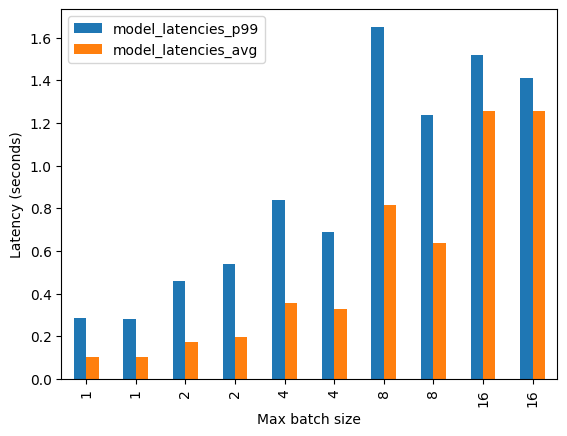

In [15]:
# yolo 5n
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'yolov5n']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

,model_variant,max_batch_size,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,yolov5m,1,0.229681,872.139475,0.159899
1,yolov5m,1,0.212636,2225.663702,0.160001
2,yolov5m,2,0.432192,767.008656,0.318409
3,yolov5m,2,0.414404,2075.306066,0.313605
4,yolov5m,4,0.906732,650.343609,0.648725
5,yolov5m,4,0.780302,1871.517656,0.668191
6,yolov5m,8,1.771126,667.919178,1.449526
7,yolov5m,8,1.552486,1877.260880,1.407840
8,yolov5m,16,3.639643,728.755460,3.281588
9,yolov5m,16,3.405638,2043.575312,3.007310


Text(0, 0.5, 'Latency (seconds)')

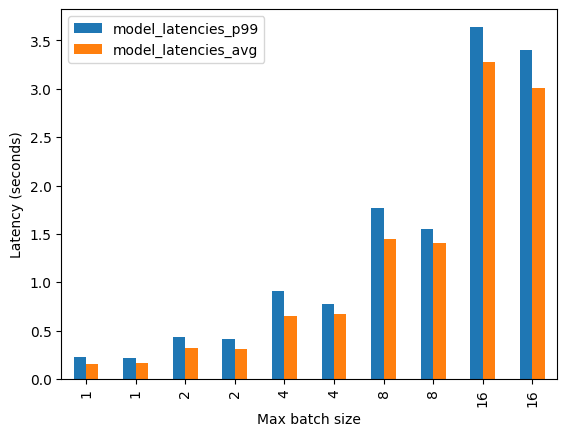

In [14]:
# resnet 5s
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'yolov5m']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

Text(0, 0.5, 'Latency (seconds)')

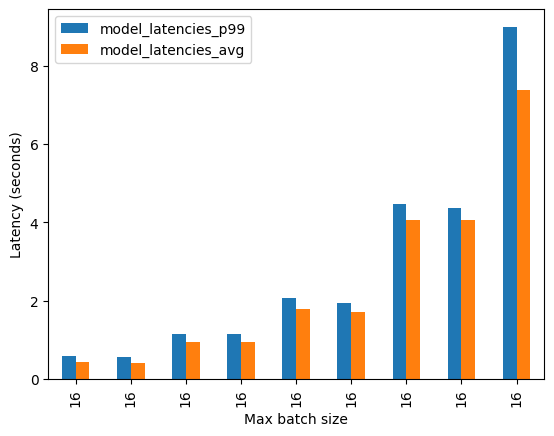

In [16]:
# yolov5x
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'yolov5x']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
ax = output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

,model_variant,cpu_request,memory_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,yolov5n,16,40Gi,0.460552,538.296242,0.175557
1,yolov5n,16,40Gi,0.537392,1634.842875,0.194778
2,yolov5m,16,40Gi,0.432192,767.008656,0.318409
3,yolov5m,16,40Gi,0.414404,2075.306066,0.313605
4,yolov5x,16,40Gi,1.154209,1687.035852,0.941032
5,yolov5x,16,40Gi,1.146128,4614.602874,0.940430


Text(0, 0.5, 'Latency (seconds)')

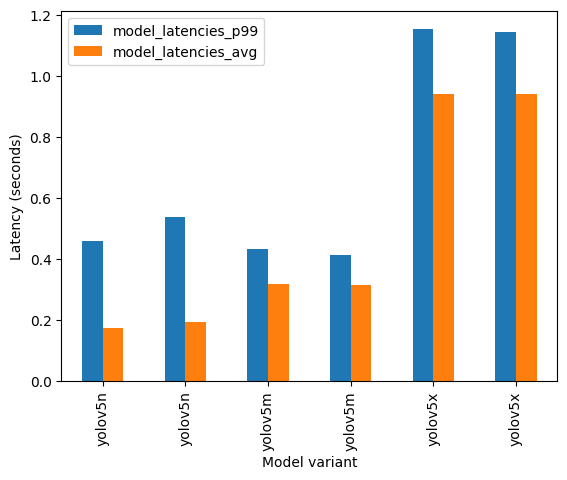

In [17]:
experiment_ids = key_config_df[
    key_config_df['max_batch_size'] == 2]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='model_variant', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Model variant")
ax.set_ylabel("Latency (seconds)")